# Genome Size Vs Complexity

### Imports

In [1]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm
import concurrent.futures
from goals import and_funct
import time
executor = concurrent.futures.ProcessPoolExecutor()

Setting up some utility functions and an object to track isomorphisms

In [2]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

def run_in_parallel(function, axis, num_itter, size, isomorphism_counter, *args):
    total_times = []
    total_mutations = []
    
    future_results = [executor.submit(function, *args) for _ in range(num_itter)]
    time.sleep(240)
    for f in tqdm(concurrent.futures.as_completed(future_results)):
        mutationtimes, circuit, fitness = f.result()
        axis.plot(fitness)
        if fitness[-1] == 1:
            total_mutations.append(len(mutationtimes))
            total_times.append(mutationtimes[-1])
            isomorphism_counter.add(circuit, size)
        else:
            print("uh oh didnt get to full fitness")
    return total_mutations, total_times

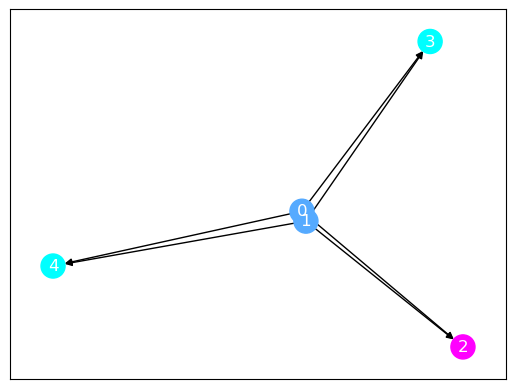

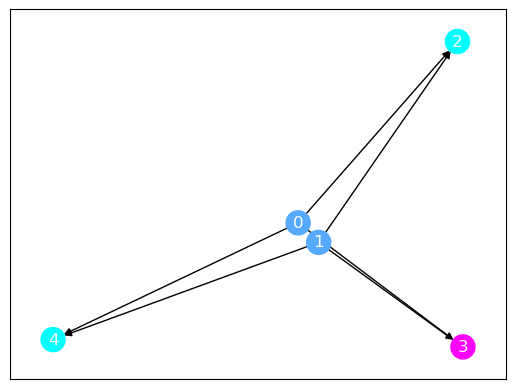

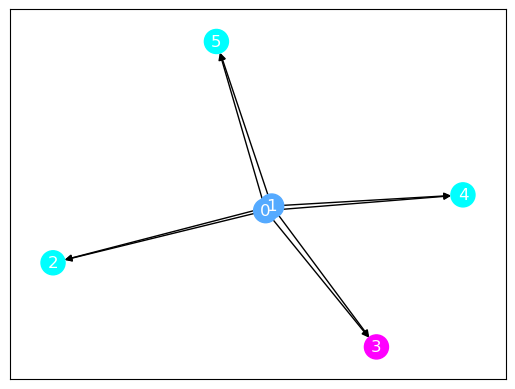

In [3]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [4]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Now the actual simulation

In [5]:
sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 40, 80, 100]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram_mutations, ax_histograms_mutations = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram_times, ax_histograms_times = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means_mutations = []
medians_mutations = []
stds_mutations = []
means_times = []
medians_times = []
stds_times = []
isomorphism_counter = IsomorphismCounter()
num_trials = 50
for size, ax_trajectory, ax_histogram_mutations, ax_histogram_times in zip(sizes, ax_trajectories, ax_histograms_mutations, ax_histograms_times):
    ax_trajectory.set_title(size)
    ax_histogram_mutations.set_title(size)
    ax_histogram_times.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    print(size)
    mutations, times = run_in_parallel(run_evolution_strong_selection, ax_trajectory, num_trials, size, isomorphism_counter, and_funct, 1000, 0.1, initial_circuit, 10000, 500000)
    times_array = np.array(times)
    mutations_array = np.array(mutations)
    medians_mutations.append(np.median(mutations_array))
    print("Median:" + str(medians_mutations[-1]))
    means_mutations.append(mutations_array.mean())
    print("Mean:" + str(means_mutations[-1]))
    stds_mutations.append(mutations_array.std())
    print("STD:" + str(stds_mutations[-1]))
    ax_histogram_mutations.hist(mutations, 20)
    ax_histogram_times.hist(times, 20)
fig_trajectory.savefig('trajectories_and_big.png', dpi=1200)
fig_histogram_mutations.suptitle("Histogram of Number of Mutations")
fig_histogram_mutations.savefig('histogram_fixations_mutations_and_big.png')
fig_histogram_times.suptitle("Histogram of Fixation Times")
fig_histogram_times.savefig('histogram_fixations_times_and_big.png')
plt.show()

2


Process SpawnProcess-7:
Process SpawnProcess-6:
Process SpawnProcess-5:
Process SpawnProcess-4:
Process SpawnProcess-3:
Process SpawnProcess-2:
Process SpawnProcess-8:
Process SpawnProcess-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/zachary.boroda/anaconda3/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/zachary.boroda/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/zachary.boroda/anaconda3/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/zachary.boroda/anaconda3/lib/python3.10/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Users/zachary.boroda/anaconda3/lib/python3.10/multiprocessing/queues.py", line 102, in get
    with self._r

1000 2.050981184410161 0.75
2000 4.089700445983323 0.75
3000 6.060677708645014 0.75
4000 8.114406464827741 0.75
5000 10.125397089535271 0.75
6000 12.037782375855866 0.75
7000 14.102597200858398 0.75
1000 1.9806989264436599 0.75
2000 4.011620193620442 0.75
3000 6.129688969221325 0.75
4000 8.120368590678742 0.75
5000 10.023552097469953 0.75
6000 12.047998306273152 0.75
7000 13.955439496089122 0.75
8000 15.949709401702092 0.75
9000 17.927307543007792 0.75
10000 19.912915239139718 0.75
11000 21.933026637827655 0.75
12000 23.91842371311154 0.75
13000 25.81303397924881 0.75
14000 27.836320959472797 0.75
15000 29.810991693131975 0.75
16000 31.710934400619895 0.75
17000 33.611605347460724 0.75
18000 35.65182405192295 0.75
19000 37.59253710383097 0.75
20000 39.60598705715297 0.75
21000 41.598131975465506 0.75
22000 43.58681771651619 0.75
23000 45.55616653634749 0.75
24000 47.62179129735562 0.75
25000 49.631917405946055 0.75
26000 51.65702074947197 0.75
27000 53.74513044775899 0.75
28000 55.7857


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f9b04d73910> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f9b04f505e0> (for post_execute):



KeyboardInterrupt



In [ ]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means_mutations, yerr=np.array(stds_mutations)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians_mutations)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

In [ ]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [ ]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

In [ ]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [ ]:
len(isomorphism_counter.counter)

Now to test how unique this behavior is via a random walk

In [ ]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])

We are seeing tradeoff -> resilance vs speed

Track resilance score for each network